## Gradient Descent With Linear Regression

In [1]:
using Plots
#Pkg.add("plots")

### Random Plot

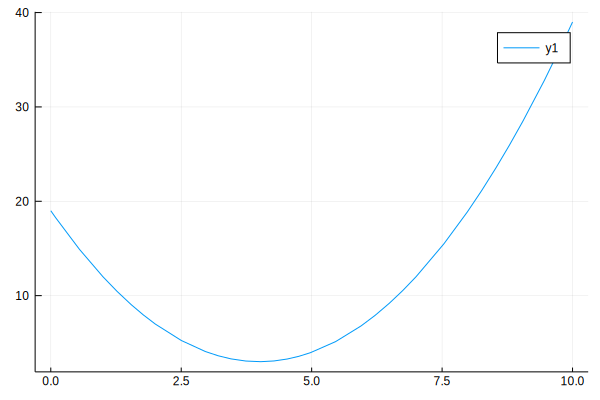

In [2]:
f(x) = (x-4)^2+3
plot(f, 0, 10)

In [3]:
function F(x, ϵ) #finite difference
    return(f(x+ϵ)-f(x))/ϵ
end

F (generic function with 1 method)

### Gradient Descent

$$\Theta_{j}=\Theta_{j}-\alpha \frac{\partial}{\partial \Theta_{j}} J\left(\Theta_{0}, \Theta_{1}\right)$$

In [4]:
function grad_descent(f, x_0, α, iteration)
    points=[(x_0, f(x_0))]
    for _ = 1:iteration
        x_0 = x_0 - α * F(x_0,0.001)
        push!(points, (x_0, f(x_0)))
    end
    return points
end

grad_descent (generic function with 1 method)

In [6]:
XX = grad_descent(f, 9.0, 0.12, 10)

11-element Array{Tuple{Float64,Float64},1}:
 (9.0, 28.0)                             
 (7.799880000000542, 17.439088014404117) 
 (6.887788799999811, 11.339324153404348) 
 (6.194599487999724, 7.816266912728652)  
 (5.667775610879616, 5.781475488244876)  
 (5.267389464268334, 4.606276054138374)  
 (4.963095992843925, 3.9275538914320265) 
 (4.731832954561362, 3.535579473382013)  
 (4.5560730454666185, 3.30921723189452)  
 (4.422495514554573, 3.1785024598187333) 
 (4.3209765910614415, 3.1030259720094238)

### Representation of the steps

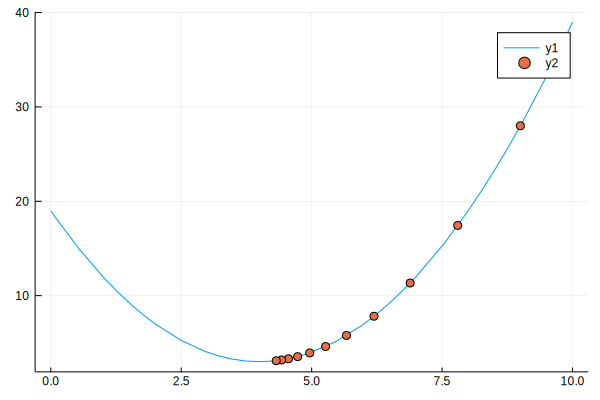

In [7]:
scatter!(XX)

In [8]:
D=[(.75,2.5),(1.3,3.2),(2.1,2.6),(3.0,3.9),(2.9,4.8),(3.6,4.2),(4.2,6.1)]

7-element Array{Tuple{Float64,Float64},1}:
 (0.75, 2.5)
 (1.3, 3.2) 
 (2.1, 2.6) 
 (3.0, 3.9) 
 (2.9, 4.8) 
 (3.6, 4.2) 
 (4.2, 6.1) 

### Regression Using Gradient Descent 

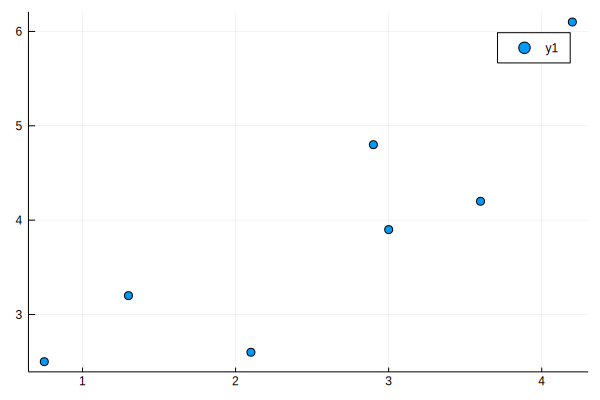

In [9]:
scatter(D)

In [10]:
W = rand(2)

2-element Array{Float64,1}:
 0.06982518128809545
 0.6982774463700332 

In [11]:
function ŷ(x, W)
    return W' * [x[1], 1.0]
end

ŷ (generic function with 1 method)

#### MSE Cost Function

$$J(\theta)=\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$$

In [12]:
function L(D, W)
    return .5 * sum([(x[2]-ŷ(x, W))^2 for x in D])
end

L (generic function with 1 method)

In [13]:
L(D,W)

36.385954198099135

In [14]:
function VL(D,W)
    return [sum([-x[1]*(x[2]-ŷ(x,W)) for x in D]),
        sum([(x[2] - ŷ(x,W)) for x in D])]
end

VL (generic function with 1 method)

In [15]:
function steep_descent(D, W, α, i)
    for _ = 1:i
        W = W - α * VL(D,W)
    end
    return W
end

steep_descent (generic function with 1 method)

### Regression Line

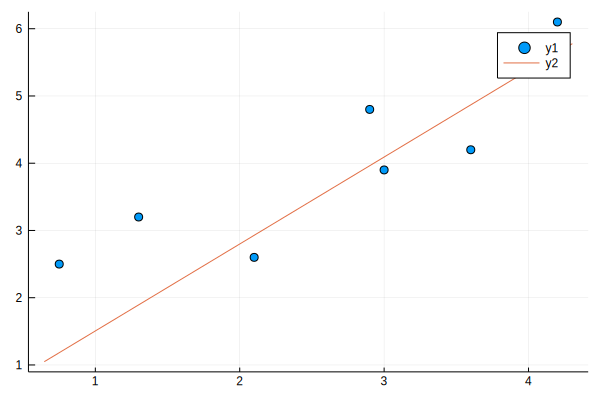

In [16]:
W = steep_descent(D, W, .002,30)
scatter(D)
plot!(x -> W[1]*x + W[2])